# Árvores Geradoras

Uma **árvore geradora** (ou árvore geradora mínima, em alguns contextos) é um subgrafo de um grafo conexo e não direcionado que inclui todos os vértices do grafo original e é uma árvore (ou seja, é conexa e acíclica).  
Principais características:
- Contém todos os vértices do grafo original.
- Não possui ciclos.
- É conexa.
- Possui exatamente (n-1) arestas, onde n é o número de vértices.

Árvores geradoras são fundamentais em algoritmos de otimização, como os algoritmos de Kruskal e Prim, que buscam a árvore geradora de menor peso em grafos ponderados.

# O que é um Grafo Conexo?

Um **grafo conexo** é um grafo não direcionado no qual existe pelo menos um caminho entre qualquer par de vértices.  
Em outras palavras, é possível ir de qualquer vértice a qualquer outro vértice do grafo, seguindo as arestas disponíveis.

Se um grafo não for conexo, ele é chamado de **grafo desconexo** e é composto por duas ou mais componentes conexas (subgrafos conexos independentes).

# Exemplo prático: Grafo conexo e sua árvore geradora mínima

No exemplo a seguir, criamos um grafo conexo ponderado utilizando a biblioteca NetworkX.  
O grafo representa um conjunto de vértices conectados por arestas com pesos (custos).  
Utilizamos o algoritmo de árvore geradora mínima para encontrar o subconjunto de arestas que conecta todos os vértices com o menor custo total possível, sem formar ciclos.

O código também exibe, lado a lado, o grafo original e a árvore geradora mínima encontrada.

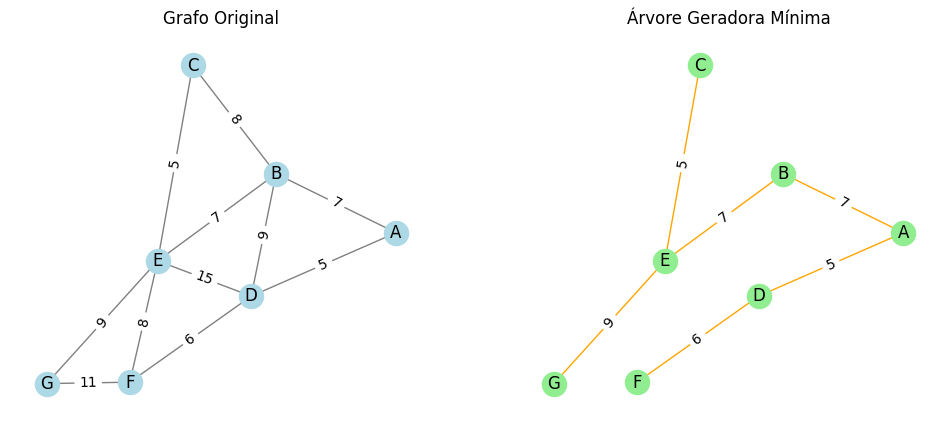

Vetor de roteamento (predecessores) a partir do vértice 'A':
A: raiz
B: A
C: E
D: A
E: B
F: D
G: E


In [10]:
import networkx as nx
import matplotlib.pyplot as plt

# Criando um grafo conexo ponderado
G = nx.Graph()
G.add_weighted_edges_from([
    ('A', 'B', 7),
    ('A', 'D', 5),
    ('B', 'C', 8),
    ('B', 'D', 9),
    ('B', 'E', 7),
    ('C', 'E', 5),
    ('D', 'E', 15),
    ('D', 'F', 6),
    ('E', 'F', 8),
    ('E', 'G', 9),
    ('F', 'G', 11)
])

# Encontrando a árvore geradora mínima
mst = nx.minimum_spanning_tree(G)

# Plotando o grafo original
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Grafo Original")

# Plotando a árvore geradora mínima
plt.subplot(1, 2, 2)
nx.draw(mst, pos, with_labels=True, node_color='lightgreen', edge_color='orange')
labels_mst = nx.get_edge_attributes(mst, 'weight')
nx.draw_networkx_edge_labels(mst, pos, edge_labels=labels_mst)
plt.title("Árvore Geradora Mínima")

plt.show()

# Exibindo o vetor de roteamento (predecessores) da árvore geradora mínima
# O vetor de roteamento mostra para cada vértice, qual é o seu predecessor na árvore geradora mínima.
# Usamos o resultado do algoritmo de busca em largura (BFS) a partir de um nó raiz, por exemplo, 'A'.

predecessors = nx.predecessor(mst, source='A')
print("Vetor de roteamento (predecessores) a partir do vértice 'A':")
for node in sorted(mst.nodes()):
    if node == 'A':
        print(f"{node}: raiz")
    else:
        # predecessor retorna uma lista, pegamos o primeiro elemento
        pred = predecessors[node][0] if predecessors[node] else None
        print(f"{node}: {pred}")

# Definição formal e exemplo de árvore geradora

**Definição 4 (Árvore geradora):**  
Seja $G$ um grafo conexo. Uma **árvore geradora** $T$ em $G$ é um subgrafo de $G$ que inclui todos os seus vértices e também é uma árvore.

**Exemplo:**  
Considere o grafo abaixo:

```
Grafo G:
A --- B
|   / |
|  /  |
C ----D
```

Uma possível árvore geradora $T$ para esse grafo é:

```
Árvore geradora T:
A --- B
|     
C     D
```

Neste exemplo, $T$ conecta todos os vértices de $G$ sem formar ciclos e utiliza o menor número possível de arestas.

# Exemplo em NetworkX: Construindo uma árvore geradora

Vamos ilustrar a definição de árvore geradora com um exemplo prático usando a biblioteca NetworkX.

Considere o seguinte grafo simples com quatro vértices:

- Os vértices representam pontos de uma rede.
- As arestas representam conexões possíveis entre esses pontos.

O objetivo é encontrar uma árvore geradora, ou seja, um subconjunto das conexões que liga todos os pontos sem formar ciclos.

No código abaixo, criamos o grafo, exibimos sua estrutura e destacamos uma árvore geradora encontrada automaticamente pelo NetworkX.

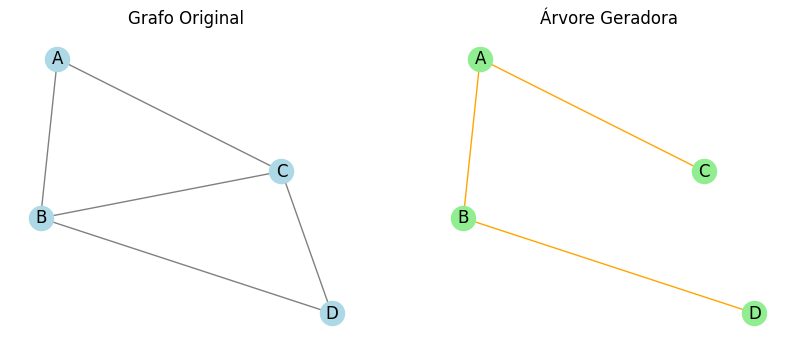

Vetor de roteamento (predecessores) a partir do vértice 'A' (exemplo simples):
A: raiz
B: A
C: A
D: B


In [11]:
import networkx as nx
import matplotlib.pyplot as plt

# Grafo exemplo (mesmo do exemplo textual)
G_ex = nx.Graph()
G_ex.add_edges_from([
    ('A', 'B'),
    ('A', 'C'),
    ('B', 'C'),
    ('B', 'D'),
    ('C', 'D')
])

# Encontrando uma árvore geradora
T_ex = nx.minimum_spanning_tree(G_ex)

# Plotando o grafo original e a árvore geradora
plt.figure(figsize=(10, 4))
pos_ex = nx.spring_layout(G_ex, seed=1)

plt.subplot(1, 2, 1)
nx.draw(G_ex, pos_ex, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title("Grafo Original")

plt.subplot(1, 2, 2)
nx.draw(T_ex, pos_ex, with_labels=True, node_color='lightgreen', edge_color='orange')
plt.title("Árvore Geradora")

plt.show()

# Exibindo o vetor de roteamento (predecessores) da árvore geradora do exemplo simples
predecessors_ex = nx.predecessor(T_ex, source='A')
print("Vetor de roteamento (predecessores) a partir do vértice 'A' (exemplo simples):")
for node in sorted(T_ex.nodes()):
    if node == 'A':
        print(f"{node}: raiz")
    else:
        pred = predecessors_ex[node][0] if predecessors_ex[node] else None
        print(f"{node}: {pred}")

# Métodos para encontrar uma árvore geradora: construção e remoção

Dado um grafo conexo $G$, podemos encontrar uma árvore geradora $T$ utilizando dois métodos principais:

**1. Método por construção:**  
Selecionamos arestas do grafo, uma de cada vez, tomando o cuidado para não formar ciclos. Repetimos o procedimento até que todos os vértices estejam incluídos na árvore.

Por exemplo, no grafo $G$ da figura abaixo, podemos selecionar as arestas $(a, c)$, $(a, b)$ e $(a, d)$, obtendo a árvore geradora $T_1$:

![Exemplo de construção de árvore geradora](attachment:0e7c2e7e-1e8e-4e7e-8e7e-1e8e4e7e8e7e.png)

**2. Método por remoção:**  
Começamos com todas as arestas do grafo e removemos, uma a uma, as arestas que formam ciclos, até que reste uma árvore que conecta todos os vértices.

Ambos os métodos garantem que a árvore geradora resultante seja conexa e acíclica, contendo todos os vértices do grafo original.

# Exemplo 6.4: Árvores geradoras do grafo de Petersen

A figura abaixo mostra o grafo de Petersen $P$ e três de suas árvores geradoras ($T_1$, $T_2$ e $T_3$):

![Árvores geradoras do grafo de Petersen](attachment:0e7c2e7e-1e8e-4e7e-8e7e-1e8e4e7e8e7e.png)

O grafo de Petersen é um grafo não direcionado com 10 vértices e 15 arestas, famoso em teoria dos grafos por suas propriedades e aplicações.

- Cada árvore geradora é um subgrafo de $P$ que conecta todos os vértices sem formar ciclos.
- Se o grafo for rotulado, ele possui exatamente 2000 árvores geradoras distintas.

Abaixo, mostramos como construir o grafo de Petersen com NetworkX e calcular o número de árvores geradoras usando a matriz laplaciana.

Número de árvores geradoras do grafo de Petersen: 2000


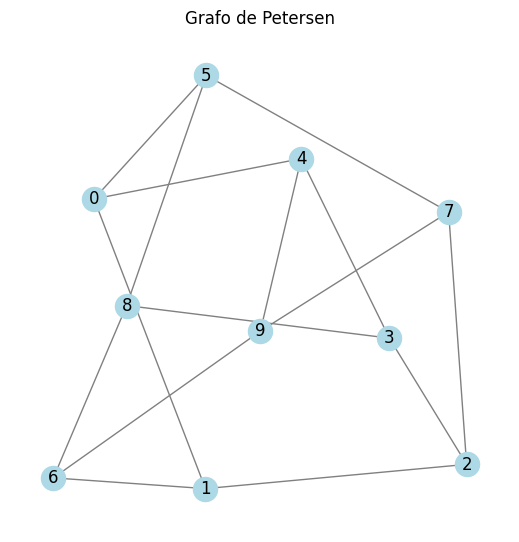

In [12]:
import networkx as nx
import numpy as np

# Grafo de Petersen
P = nx.petersen_graph()

# Número de árvores geradoras pelo Teorema de Kirchhoff (determinante da matriz laplaciana reduzida)
L = nx.laplacian_matrix(P).toarray()
# Remove a primeira linha e coluna para calcular o determinante da matriz reduzida
L_minor = L[1:, 1:]
num_arvores = round(np.linalg.det(L_minor))

print(f"Número de árvores geradoras do grafo de Petersen: {num_arvores}")

# Exibindo o grafo de Petersen
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
nx.draw(P, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title("Grafo de Petersen")
plt.show()